# MNIST 손글씨 인식하기: 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print("학습셋 이미지 수 : {} 개".format(X_train.shape[0]))
print("테스트셋 이미지 수 : {} 개".format(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [ ]:
X_test.shape # 이건 28x28픽셀값을 가진 사진이 만장있는 거

(10000, 28, 28)

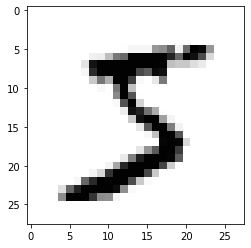

In [ ]:
plt.imshow(X_train[0], cmap= 'Greys') # cmap은 배경색
plt.show()

In [ ]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
# 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
x_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [ ]:
# 클래스 값 확인
print("class : {}".format(y_train[0]))

class : 5


In [ ]:
# 바이너리화 과정
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 10칸짜리 2진화가 됨
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 딥러닝 기본 프레임 만들기

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# 가로 x 세로로 저장되어 있던 걸
X_train[1][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
# 실수로 변경해서 정규화 시킴
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [ ]:
# 한줄로 만듦
X_train[1][0:5]

array([0., 0., 0., 0., 0.])

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# 바이너리화 과정
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 모델 구조 설정
model = Sequential()
# 784인 이유는 28*28=784 픽셀이므로 총 784 feature
# 입력값 784개, 은닉층 512개
model.add(Dense(512, input_dim = 784, activation = 'relu'))
# 위에서 가로x세로 를 한 줄로 바꾼다음 넣었으므로 input_dim은 784임
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer ='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 최적화
# 저장 위치 지정
modelpath ='./MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size=200,
                    verbose=1, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/30
221/225 [============================>.] - ETA: 0s - loss: 0.3569 - accuracy: 0.9003
Epoch 1: val_loss improved from inf to 0.19014, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 4s 15ms/step - loss: 0.3539 - accuracy: 0.9011 - val_loss: 0.1901 - val_accuracy: 0.9469
Epoch 2/30
221/225 [============================>.] - ETA: 0s - loss: 0.1556 - accuracy: 0.9546
Epoch 2: val_loss improved from 0.19014 to 0.13976, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 3s 14ms/step - loss: 0.1547 - accuracy: 0.9550 - val_loss: 0.1398 - val_accuracy: 0.9590
Epoch 3/30
221/225 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.9702
Epoch 3: val_loss improved from 0.13976 to 0.12082, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 3s 14ms/step - loss: 0.1032 - accuracy: 0.9702 - val_loss: 0.1208 - val_accuracy: 0.9653
Epoch 4/30
221/225 [============================>.] - ETA: 0s - l

In [ ]:
# 테스트 정확도 측정
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0736 - accuracy: 0.9795

 Test Accuracy: 0.9795


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

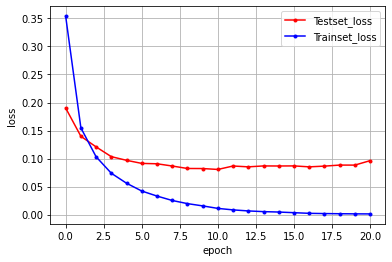

In [ ]:
# 그래프
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

#그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()